In [1]:
import pandas as pd
from datetime import datetime

def format_date(date_str):
    date_str = str(date_str)
    parsed_date = datetime.strptime(date_str, "%Y%m%d")
    return parsed_date.strftime("%Y-%m-%d")

#Result_10 is data downloaded from datagrip
df = pd.read_csv('Result_10.csv', index_col=False, on_bad_lines='skip')
df['ev_date'] = df['ev_date'].apply(format_date)
df=df.set_index('ev_date')


C:\Users\lucij\AppData\Local\Temp\ipykernel_18288\2516920500.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


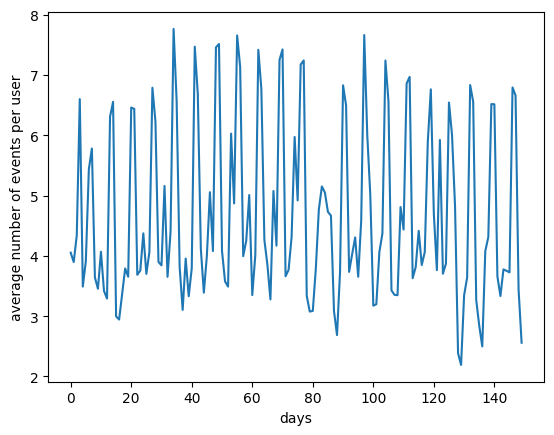

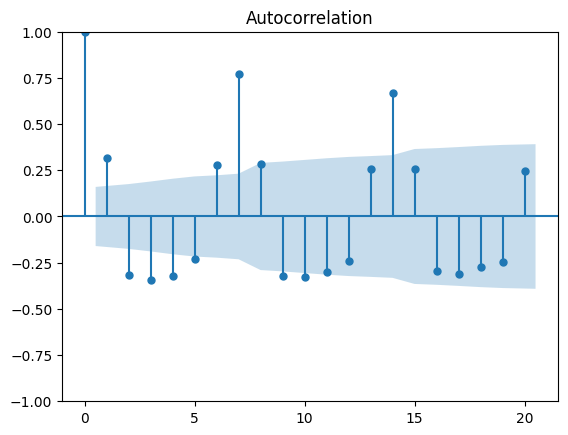

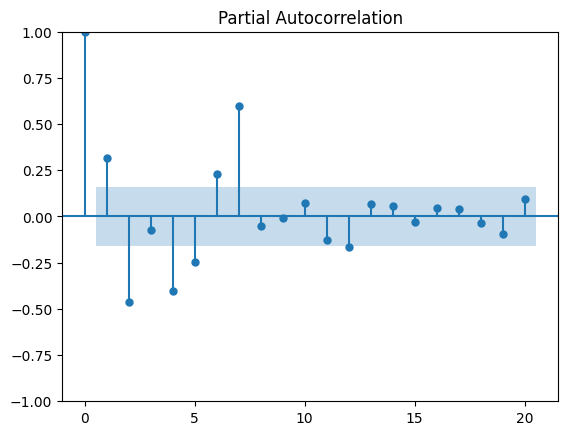

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

xpoints = np.arange(0, 150)
plt.plot(xpoints, df['avg_events_per_user'])
plt.xlabel('days')
plt.ylabel('average number of events per user')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_acf(df['avg_events_per_user'], lags=20)
fig_2=plot_pacf(df['avg_events_per_user'], lags=20)

#p=7 and q=0 since we clearly see that ACF is sinusoidal and PACF after lag 7 doesn't
#have any more spikes

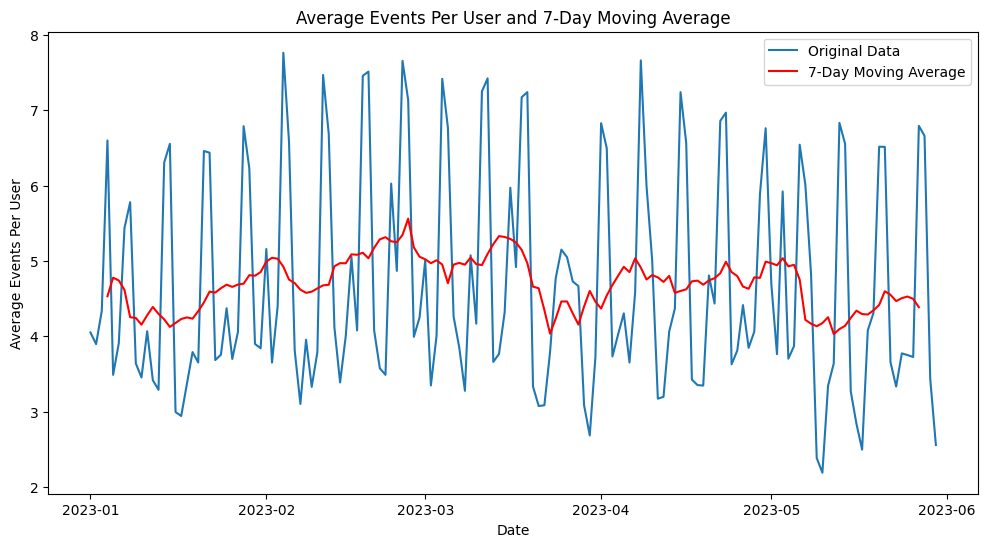

In [125]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = pd.read_csv('Result_10.csv', index_col=False, on_bad_lines='skip')

def format_date(date_int):
    date_str = str(date_int)  
    parsed_date = datetime.strptime(date_str, "%Y%m%d")
    return parsed_date

df['ev_date'] = df['ev_date'].apply(format_date)
df.set_index('ev_date', inplace=True)
df.sort_index(inplace=True)
df['MA7'] = df['avg_events_per_user'].rolling(7, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_events_per_user'], label='Original Data')
plt.plot(df.index, df['MA7'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.title('Average Events Per User and 7-Day Moving Average')
plt.legend()
plt.show()
 



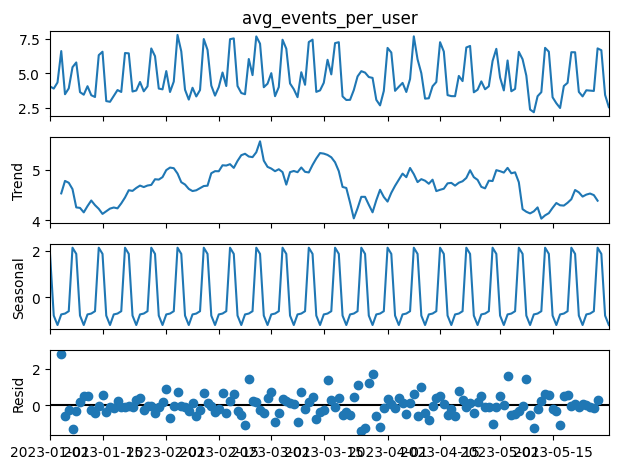

In [126]:
seasonal_decomp = seasonal_decompose(df['avg_events_per_user'], model="additive", period=7)  
fig = seasonal_decomp.plot()
plt.show()

#we can see that STL did better job since trend i smoother and seasonality is still clearly
#noticable. since classical decomp has assumption of constant amplitude of seasonality
#it can "leave" variability of seasonality into trend because seasonality had
#to have constant amplitude, which happened here. also, STL can addapt to changing 
# seasonality, and since these are daily data, weekly seasonality can change thought year

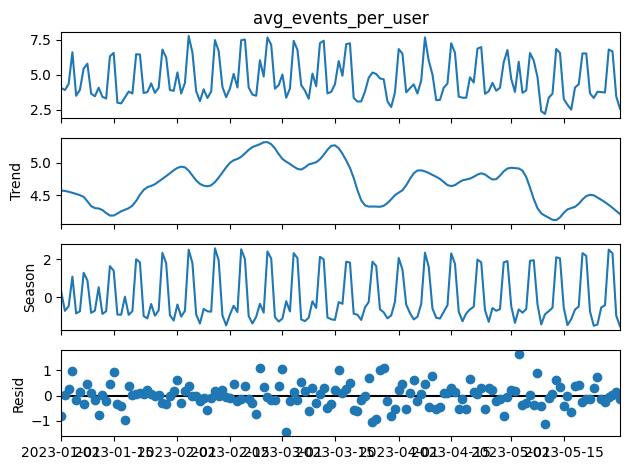

In [127]:
from statsmodels.tsa.seasonal import STL
stl_decomp = STL(df['avg_events_per_user'], seasonal=7)
res = stl_decomp.fit()
fig = res.plot()

In [3]:
import statsmodels.api as sm

df = pd.read_csv('Result_10.csv', index_col=False, on_bad_lines='skip')

#formatting df to have one column of averages and dates as indexes
def format_date(date_int):
    date_str = str(date_int)  
    parsed_date = datetime.strptime(date_str, "%Y%m%d")
    return parsed_date

df['ev_date'] = df['ev_date'].apply(format_date)
df.set_index('ev_date', inplace=True)
df.sort_index(inplace=True)

from statsmodels.tsa.stattools import adfuller

#conducting adfuller test for uniroot
#H0: The time series has a unit root (it is non-stationary).
X = df['avg_events_per_user'].dropna()
result = adfuller(X)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))
#since p value is <0.05 we conclude to reject H0 (we can say that time series is stationary)

ADF Statistic: -3.266270
p-value: 0.016455
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


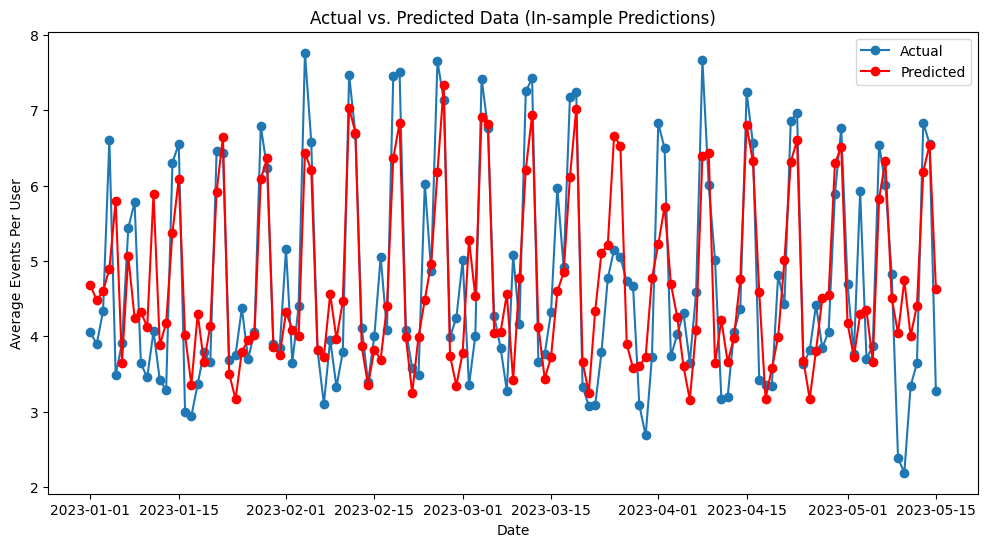

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA as ARIMA

train_data = df['2023-01-01':'2023-05-15']
test_data = df['2023-05-16':'2023-05-30']

# Fitting the ARIMA model using the train dataset
model = ARIMA(train_data, order=(7, 0, 0))
model_fit = model.fit()
# Making in-sample predictions
pred_values_train = model_fit.predict(start='2023-01-01', end='2023-05-15', dynamic=False)

# Plotting actual vs. predicted for the train dataset
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual', marker='o')
plt.plot(train_data.index, pred_values_train, label='Predicted', color='red', marker='o')
plt.title('Actual vs. Predicted Data (In-sample Predictions)')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.legend()
plt.show()


c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


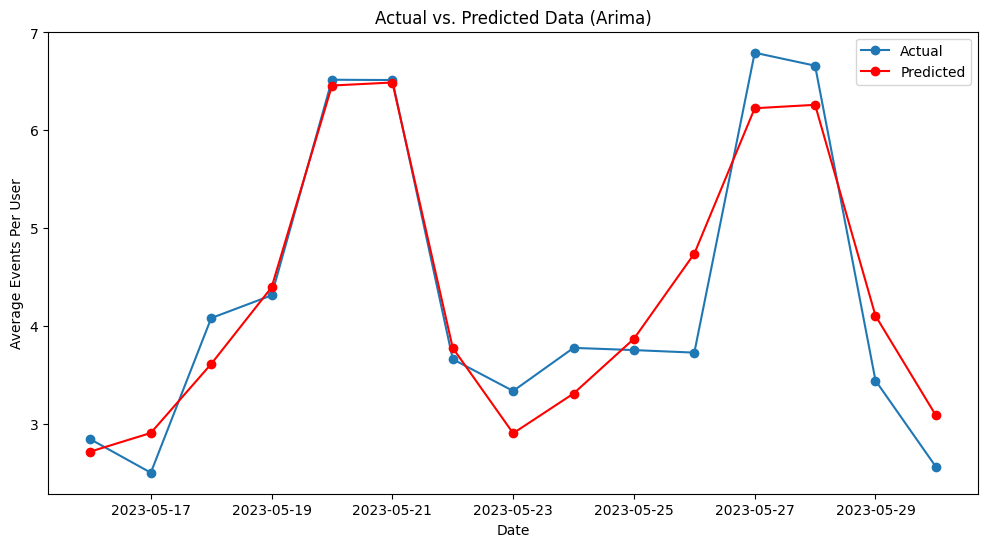

In [5]:
import matplotlib.pyplot as plt

train_data = df['2023-01-01':'2023-05-15']
test_data = df['2023-05-16':'2023-05-30']
model = ARIMA(train_data, order=(7, 0, 0))
model_fit = model.fit()

pred_values = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o')
plt.plot(test_data.index, pred_values, label='Predicted', color='red', marker='o')
plt.title('Actual vs. Predicted Data (Arima)')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.legend()
plt.show()


c:\Users\lucij\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


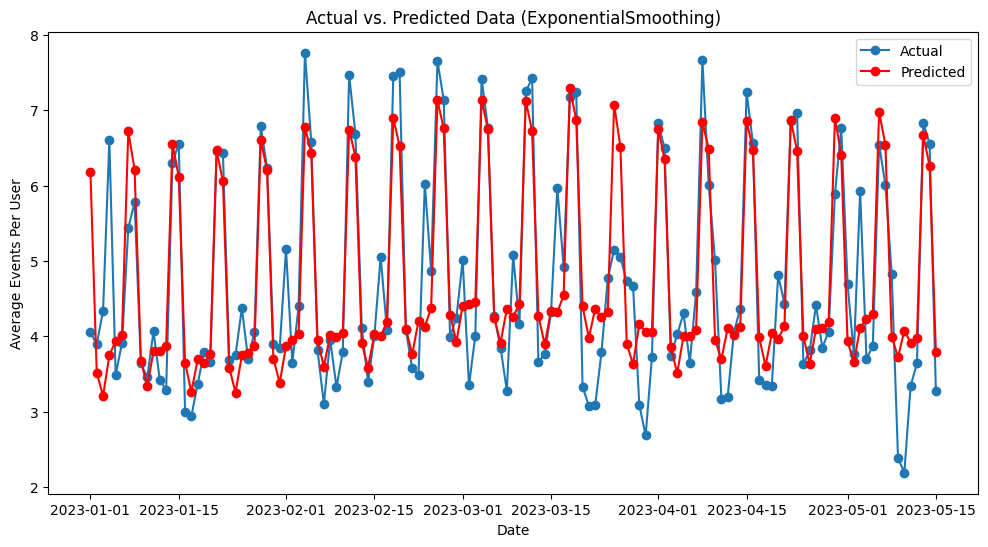

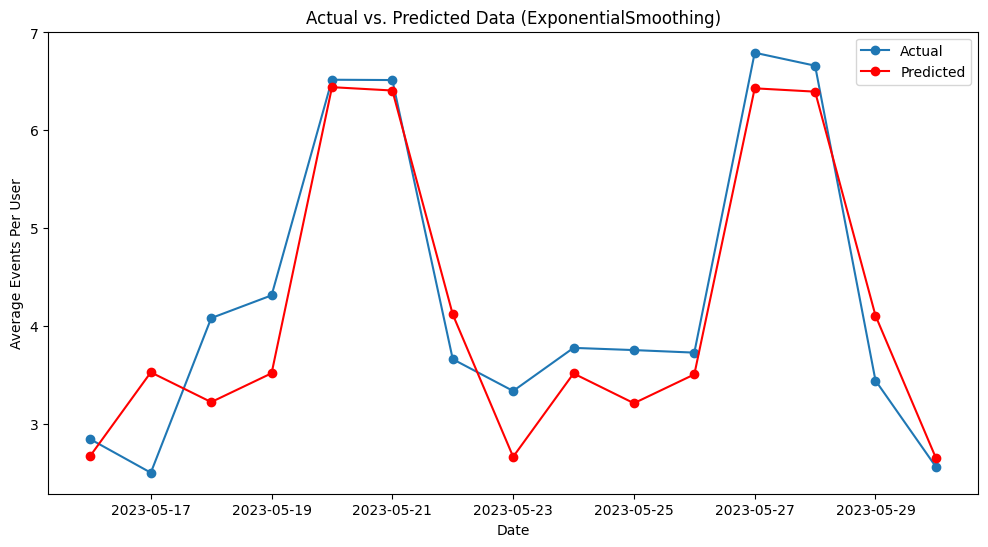

In [6]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.statespace import exponential_smoothing
ES = exponential_smoothing.ExponentialSmoothing
config = {"trend": True}
train_data.index = pd.DatetimeIndex(train_data.index, freq='D')  
stlf = STLForecast(train_data, ES, model_kwargs=config)
res = stlf.fit()
forecasts = res.forecast(15)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = exponential_smoothing.ExponentialSmoothing(train_data, trend='add', seasonal=7)
model_fit = model_es.fit()

# fitted values 
train_predictions_es = model_fit.fittedvalues
train_predictions_es=pd.DataFrame(train_predictions_es)
train_predictions_es.columns=['avg_events_per_user']

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual', marker='o')
plt.plot(train_data.index, train_predictions_es, label='Predicted', color='red', marker='o')
plt.title('Actual vs. Predicted Data (ExponentialSmoothing)')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o')
plt.plot(test_data.index, forecasts, label='Predicted', color='red', marker='o')
plt.title('Actual vs. Predicted Data (ExponentialSmoothing)')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.legend()
plt.show()




MAE and RMSE for ARIMA:
MAE: 0.36, RMSE: 0.45
MAE and RMSE for ES:
MAE: 0.36, RMSE: 0.53
MAE and RMSE for Naive Method:
MAE: 1.28, RMSE: 1.81
MAE and RMSE for Seasonal Naive Method:
MAE: 2.00, RMSE: 2.40
MAE and RMSE for Mean Method:
MAE: 1.44, RMSE: 1.55


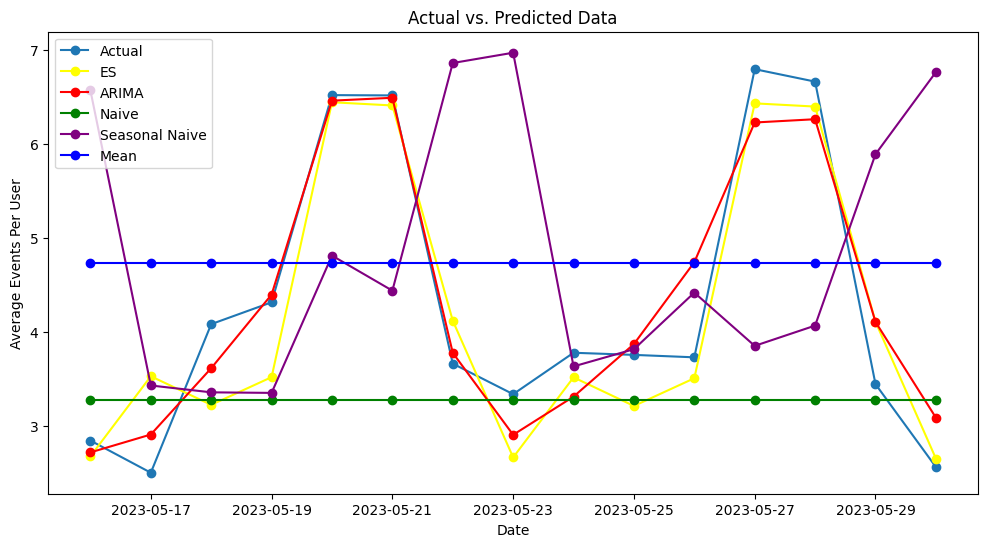

In [7]:
train_data = df['2023-01-01':'2023-05-15']
test_data = df['2023-05-16':'2023-05-30']

pred_values_naive = test_data.copy()
pred_values_naive.loc[:, 'avg_events_per_user'] = df['avg_events_per_user']['2023-05-15']
pred_values_seasonal_naive = df['2023-04-16':'2023-04-30']
pred_values_mean=test_data.copy()
pred_values_mean =  [train_data['avg_events_per_user'].mean()]*15


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_data = df['avg_events_per_user']['2023-05-16':'2023-05-30']

mae_arima = mean_absolute_error(test_data, pred_values)
rmse_arima = np.sqrt(mean_squared_error(test_data, pred_values))

mae_es = mean_absolute_error(test_data, pred_values)
rmse_es = np.sqrt(mean_squared_error(test_data, forecasts))

mae_naive = mean_absolute_error(test_data, pred_values_naive)
rmse_naive = np.sqrt(mean_squared_error(test_data, pred_values_naive))

mae_seasonal_naive = mean_absolute_error(test_data, pred_values_seasonal_naive)
rmse_seasonal_naive = np.sqrt(mean_squared_error(test_data, pred_values_seasonal_naive))

mae_mean = mean_absolute_error(test_data, pred_values_mean)
rmse_mean = np.sqrt(mean_squared_error(test_data, pred_values_mean))

print(f'MAE and RMSE for ARIMA:')
print(f'MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}')

print(f'MAE and RMSE for ES:')
print(f'MAE: {mae_es:.2f}, RMSE: {rmse_es:.2f}')

print(f'MAE and RMSE for Naive Method:')
print(f'MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}')

print(f'MAE and RMSE for Seasonal Naive Method:')
print(f'MAE: {mae_seasonal_naive:.2f}, RMSE: {rmse_seasonal_naive:.2f}')

print(f'MAE and RMSE for Mean Method:')
print(f'MAE: {mae_mean:.2f}, RMSE: {rmse_mean:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', marker='o')
plt.plot(test_data.index, forecasts, label='ES', color='yellow',marker='o')
plt.plot(test_data.index, pred_values, label='ARIMA', color='red', marker='o')
plt.plot(test_data.index, pred_values_naive, label='Naive', color='green', marker='o')
plt.plot(test_data.index, pred_values_seasonal_naive, label='Seasonal Naive', color='purple', marker='o')
plt.plot(test_data.index, pred_values_mean, label='Mean', color='blue', marker='o')
plt.title('Actual vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Average Events Per User')
plt.legend()
plt.show()



In [8]:
data=df.copy()
data['arima']=df['avg_events_per_user']
data['es']=df['avg_events_per_user']
data['naive']=df['avg_events_per_user']
data['seasonal_naive']=df['avg_events_per_user']
data['mean']=df['avg_events_per_user']
pred_values=pd.DataFrame(pred_values)
pred_values.columns = ['avg_events_per_user']
pred_values_naive=pd.DataFrame(pred_values_naive)

data['arima']['2023-05-16':'2023-05-30']=pred_values['avg_events_per_user']
data['es']['2023-05-16':'2023-05-30']=forecasts
data['naive']['2023-05-16':'2023-05-30']=pred_values_naive['avg_events_per_user']
data['seasonal_naive']['2023-05-16':'2023-05-30']=pred_values_seasonal_naive['avg_events_per_user']
data['mean']['2023-05-16':'2023-05-30']=pred_values_mean

pred_values_train=pd.DataFrame(pred_values_train)
pred_values_train.columns = ['avg_events_per_user']
print(pred_values_train)


data['arima']['2023-01-01':'2023-05-15']=pred_values_train['avg_events_per_user']
data['arima']['2023-01-01':'2023-05-15']=train_predictions_es['avg_events_per_user']

data['ev_date']=data.index
print(data.columns)
data.to_json('json_file.json', orient='records') 

            avg_events_per_user
2023-01-01             4.674768
2023-01-02             4.479949
2023-01-03             4.598361
2023-01-04             4.893384
2023-01-05             5.795449
...                         ...
2023-05-11             4.004153
2023-05-12             4.408370
2023-05-13             6.185317
2023-05-14             6.544394
2023-05-15             4.632916

[135 rows x 1 columns]
Index(['avg_events_per_user', 'arima', 'es', 'naive', 'seasonal_naive', 'mean',
       'ev_date'],
      dtype='object')


C:\Users\lucij\AppData\Local\Temp\ipykernel_18288\1167211861.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['arima']['2023-05-16':'2023-05-30']=pred_values['avg_events_per_user']
C:\Users\lucij\AppData\Local\Temp\ipykernel_18288\1